# **DAY 12 – Введение в анализ данных**  


## **Pandas, SQL, визуализация данных**

## **Task 2: Линейная диаграмма со стилями**  

Класс! Помните, что у нас есть данные о коммитах? Было бы полезно нарисовать обе метрики времени на одном графике. Что, если мы увидим закономерности?

**Вам нужно создать точно такой же график, как показано ниже (и по значениям, и по стилю):**


**1. Анализируйте только пользователей, а не администраторов.**  

**2. Используйте фильтр status = 'ready' для коммитов.**  

**3. Анализируйте только те даты, когда были зафиксированы и просмотры, и коммиты.**  


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
from sqlite3 import connect
import matplotlib.pyplot as plt

In [3]:
con = connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

In [4]:
df1 = pd.io.sql.read_sql('SELECT datetime as view\
                            FROM pageviews \
                            WHERE uid LIKE "user__%" ',
                            con, parse_dates = ['view'])
df1

,view
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


In [5]:
df2 = pd.io.sql.read_sql('''SELECT timestamp as firse_commit\
                          FROM checker\
                          WHERE status = 'ready'\
                          AND uid LIKE "user__%" ''',
                          con, parse_dates = ['firse_commit'])
df2

,firse_commit
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:45.549397
2,2020-04-17 05:34:24.422370
3,2020-04-17 05:43:27.773992
4,2020-04-17 05:46:32.275104
...,...
1681,2020-05-21 20:01:48.959966
1682,2020-05-21 20:18:54.487900
1683,2020-05-21 20:19:06.872761
1684,2020-05-21 20:22:41.877806


In [6]:
df1['date'] = df1['view'].dt.date
df2['date'] = df2['firse_commit'].dt.date
df1['views'] = 1
df2['commits'] = 1
df1.head()

,view,date,views
0,2020-04-17 22:46:26.785035,2020-04-17,1
1,2020-04-18 10:53:52.623447,2020-04-18,1
2,2020-04-18 10:56:55.833899,2020-04-18,1
3,2020-04-18 10:57:37.331258,2020-04-18,1
4,2020-04-18 12:05:48.200144,2020-04-18,1


In [7]:
df1 = df1.drop(columns='view').groupby(by='date', dropna = False).count()
df1.head()

,views
date,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1


In [8]:
df2 = df2.drop(columns='firse_commit').groupby(by='date', dropna = False).count()
df2.head()

,commits
date,
2020-04-17,13
2020-04-18,39
2020-04-19,18
2020-04-20,16
2020-04-21,13


In [9]:
df3 = pd.merge(df1, df2, how='inner', left_index=True, right_index=True)
df3.head()

,views,commits
date,,
2020-04-17,1,13
2020-04-18,23,39
2020-04-19,15,18
2020-04-21,3,13
2020-04-22,1,16


In [12]:
df3.shape

(32, 2)

**4. Размер шрифта — 8.**  

**5. figsize — 15,8.**  


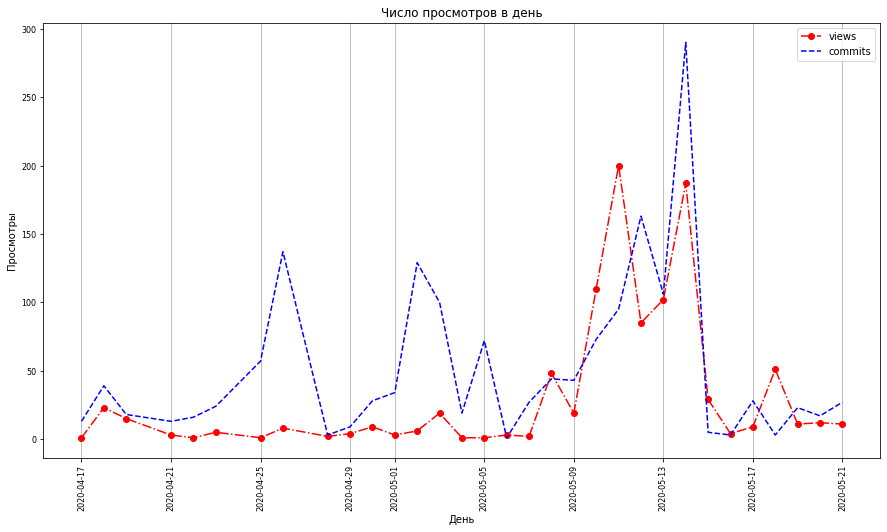

In [14]:
df3.plot(
        y=['views', 'commits'],
         color = ['red', 'blue'],
         style = ["o-.", "--"],
         figsize=(15, 8), rot=90, fontsize=8,
         title="Число просмотров в день",
         xlabel='День', ylabel='Просмотры'
)
plt.grid(axis='x')

plt.show()

**6. В конце Jupyter Notebook создайте markdown-ячейку и вставьте вопрос: «Сколько раз количество просмотров превышало 150?». В ячейке ниже добавьте: «Ответ:___». Поместите в текст конкретное число вместо подчеркивания.**

**Ответ: 2**

In [11]:
con.close()